In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터 로드 및 피처 선택
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine-learning-practice/Machine-Learning-Programming/week9/data/TSLA.csv', index_col='Date', parse_dates=True)
features = ['Open', 'High', 'Low', 'Close']
df_features = df[features]

In [4]:
# 2. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_features)

In [5]:
# 3. 시퀀스 데이터 생성
window = 3  # 최근 3일 데이터로 다음 날 종가 예측
num_features = 4 # 사용할 피처 개수 (Open, High, Low, Close)
X, y = [], []

for i in range(len(data_scaled) - window):
    # X: 3일간의 Open, High, Low, Close 데이터
    X.append(data_scaled[i:i+window])
    # y: 다음 날의 Close 가격 (Close는 4번째 열, 인덱스 3)
    y.append(data_scaled[i+window, 3])

X, y = np.array(X), np.array(y)

print(f"Original X shape: {X.shape}") # (samples, 3, 4)
print(f"Original y shape: {y.shape}") # (samples,)

Original X shape: (2953, 3, 4)
Original y shape: (2953,)


In [6]:
# 4. Train / Test 데이터 분리
train_size = int(len(y) * 0.8)
train_X = np.array(X[0 : train_size])
train_y = np.array(y[0 : train_size])

test_size = len(y) - train_size
test_X = np.array(X[train_size : len(X)])
test_y = np.array(y[train_size : len(y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (2362, 3, 4) (2362,)
테스트 데이터의 크기 : (591, 3, 4) (591,)


In [8]:
# --- SimpleRNN 모델 ---

# 5. RNN 모델 구성
rnn_model = tf.keras.Sequential([
    # input_shape는 (window_size, num_features)로 변경
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window, num_features)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 3, 64)          │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,553 (29.50 KB)

 Trainable params: 7,553 (29.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 6. RNN 모델 학습
rnn_model.fit(train_X, train_y, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.3119e-06
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2698e-06
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6439e-06
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4622e-06
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3285e-06
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6649e-06
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5811e-06
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7022e-06
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8789e-06
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9310e-06
Epoch 12/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7037e-06
Epoch 13/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9757e-06
Epoch 14/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9498e-06
Epoch

In [10]:
# 7. RNN 모델 평가 및 예측
pred_rnn = rnn_model.predict(test_X)
mse_rnn = mean_squared_error(test_y, pred_rnn)
print(f"RNN Model Test MSE: {mse_rnn}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
RNN Model Test MSE: 0.017297504091362815


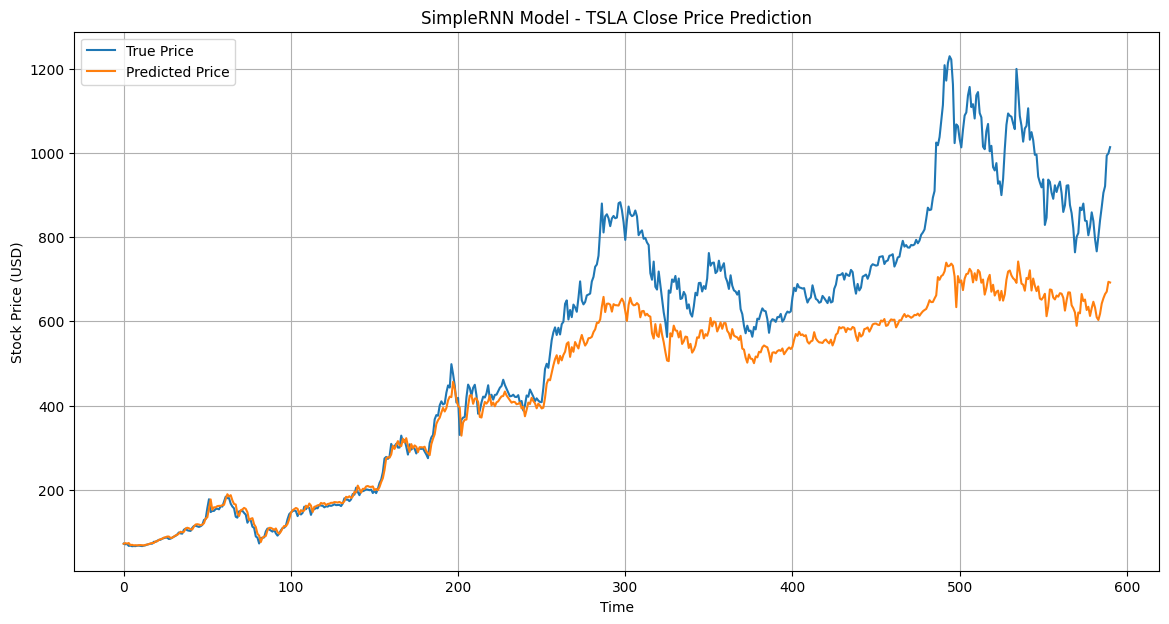

In [11]:
# 8. RNN 결과 시각화
# 예측값과 실제값을 다시 원래 스케일로 되돌리기 위한 처리
# 예측값(pred_rnn)은 Close 값에 대한 것이므로, 4개 피처 형태의 배열을 만들어 inverse_transform을 적용해야 합니다.
pred_rnn_unscaled = scaler.inverse_transform(np.hstack([np.zeros((len(pred_rnn), num_features - 1)), pred_rnn]))[:, -1]
y_test_unscaled = scaler.inverse_transform(np.hstack([np.zeros((len(test_y), num_features - 1)), test_y.reshape(-1, 1)]))[:, -1]

plt.figure(figsize=(14, 7))
plt.title('SimpleRNN Model - 테슬라 종가 가격 예측')
plt.plot(y_test_unscaled, label='True Price')
plt.plot(pred_rnn_unscaled, label='Predicted Price')
plt.xlabel('시간')
plt.ylabel('주가 (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# --- LSTM 모델 ---

# 9. LSTM 모델 구성
lstm_model = tf.keras.Sequential([
    # input_shape는 (window_size, num_features)로 변경
    tf.keras.layers.LSTM(64, input_shape=(window, num_features)),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 10. LSTM 모델 학습
lstm_model.fit(train_X, train_y, epochs=30, batch_size=16, verbose=1) # epochs, batch_size 조정

Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.4742e-04
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1551e-06
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5960e-06
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6782e-06
Epoch 5/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4271e-06
Epoch 6/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1980e-06
Epoch 7/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2836e-06
Epoch 8/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8788e-06
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1423e-06
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3075e-06
Epoch 11/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3309e-06
Epoch 12/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0551e-06
Epoch 13/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2218e-06
Epoch 14/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2932e-06
E

In [14]:
# 11. LSTM 모델 평가 및 예측
pred_lstm = lstm_model.predict(test_X)
mse_lstm = mean_squared_error(test_y, pred_lstm)
print(f"LSTM Model Test MSE: {mse_lstm}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
LSTM Model Test MSE: 0.000929631111530952


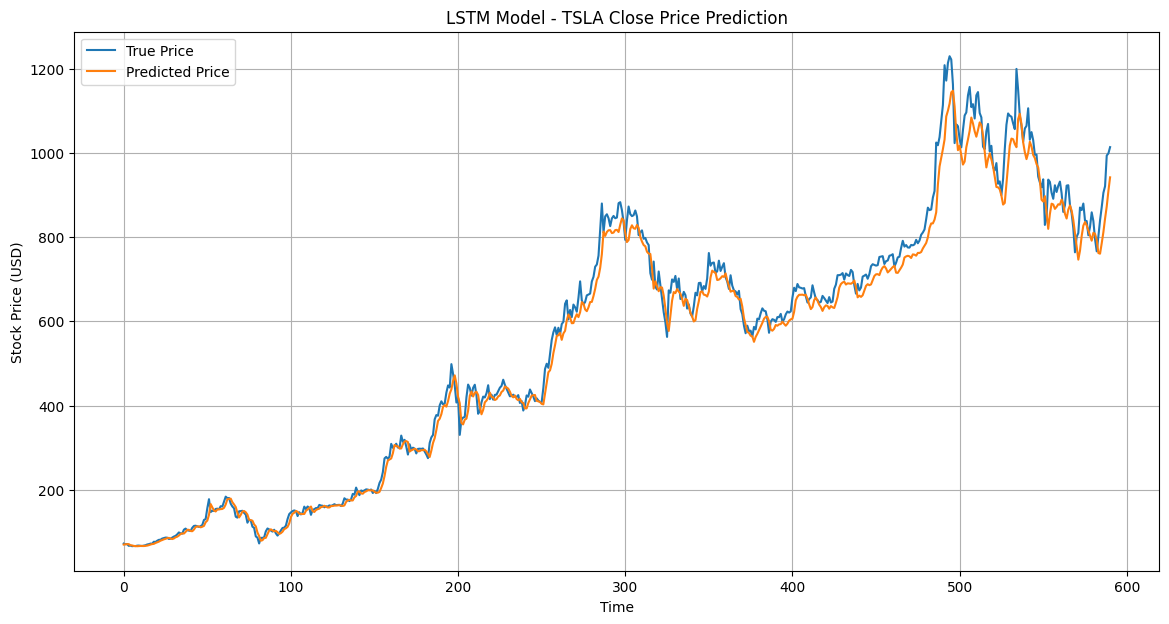

In [15]:
# 12. LSTM 결과 시각화
pred_lstm_unscaled = scaler.inverse_transform(np.hstack([np.zeros((len(pred_lstm), num_features - 1)), pred_lstm]))[:, -1]
# y_test_unscaled는 위에서 이미 계산했으므로 재사용
plt.figure(figsize=(14, 7))
plt.title('LSTM Model - 테슬라 종가 가격 예측')
plt.plot(y_test_unscaled, label='True Price')
plt.plot(pred_lstm_unscaled, label='Predicted Price')
plt.xlabel('시간')
plt.ylabel('주가 (USD)')
plt.legend()
plt.grid(True)
plt.show()